In [1]:
import numpy as np

def load(inkey, outkey):
    infile = f"/docker/mnt/d/research/D2/cnn3/predictors/{inkey}.npy"
    outfile = f"/docker/mnt/d/research/D2/cnn3/predictant/continuous/{outkey}.npy"
    predictors = np.load(infile)
    predictant = np.load(outfile)
    return predictors, predictant

In [2]:
import numpy.ma as ma

def fill(x):
    f = ma.filled(x, fill_value=99999)
    return f

def mask(x):
    m = ma.masked_where(x>9999, x)
    return m

def conc(x):
    c = x.copy()
    c = fill(c)
    x1, x2 = c[:, :, :, -36:], c[:, :, :,:36]
    c = np.concatenate([x1, x2], 3)
    return c

# 1x1 land

# raw data のvariationを調べる

(1, 42, 165, 120, 360) (42, 165, 20, 20)


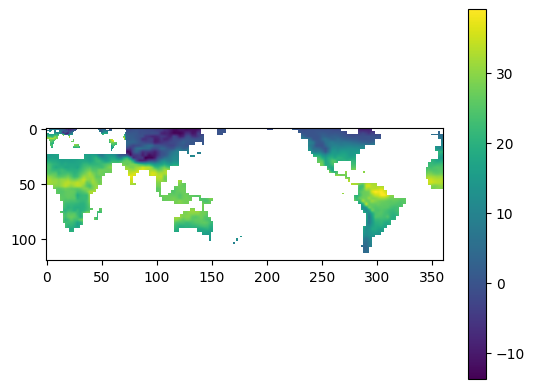

/tmp/ipykernel_926/930824309.py:18: UserWarning: Warning: converting a masked element to nan.
  std_map[i,j] = std


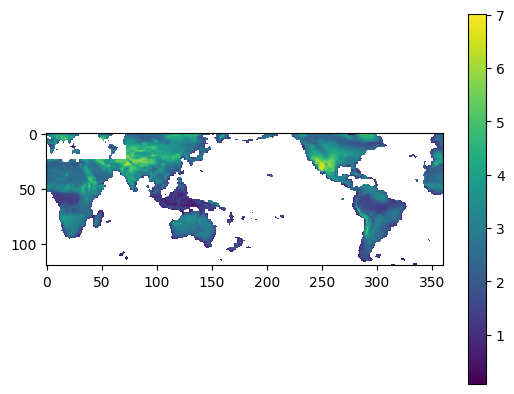

In [3]:
tors = 'predictors_raw_Apr_t'
tand = 'pr_1x1_std_MJJASO_thailand'
predictors, predictand = load(tors, tand)
print(predictors.shape, predictand.shape)

import matplotlib.pyplot as plt
land = predictors[0, :, :, :, :]
plt.imshow(mask(land[4,3]))
plt.colorbar()
plt.show()

import numpy as np
land = mask(land)
std_map = np.empty((120, 360))
for i in range(120):
    for j in range(360):
        std = np.std(land[:, :, i, j].reshape(-1))
        std_map[i,j] = std
plt.imshow(std_map)
plt.colorbar()
plt.show()

In [ ]:
e